In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
def dist( x0, y0, x1, y1 ): return np.sqrt((x0-x1)**2 + (y0-y1)**2)

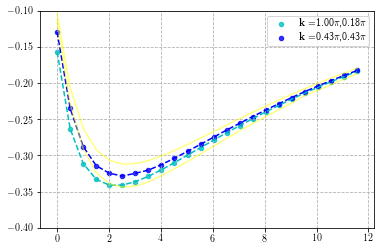

In [4]:
# Self energy data
self = np.transpose(np.loadtxt('../data/Self_energy_fill_0.975_Im.txt'))
T = 0.08

# Patch data
kx, ky = np.loadtxt('../data/Self_energy_fill_0.975_patch.txt',usecols=(0,1),unpack=True)

FSstart   = np.shape(kx)[0]-10-1
FSend     = np.shape(kx)[0]-1

#hs        = np.argmin(np.array( [ dist((np.pi-(ky[i]-kx[i]))/2.,np.pi-((np.pi-(ky[i]-kx[i]))/2. ), kx[i],ky[i]  ) for i in range(FSstart,FSend)  ] ))
imax      = np.unravel_index(np.argmin( self ), self.shape)[0] 
imin      = np.argmin([np.max(np.abs(self[i,:])) for i in range (self.shape[0])])
ikplt     =  [          FSstart        ,         FSend-1        ,  imax , imin ]
col       =  [           'c'           ,         'b'            , 'g'   , 'y']

w = np.array(range(24))
for ik, i in zip(ikplt,range(len(ikplt))):
    se_plt = self[ik,:w[-1]+1]
    lab =r"$\mathbf{k} =$"+ "{:.2f}".format(kx[ik]/np.pi)+r"$\pi$,"+"{:.2f}".format(ky[ik]/np.pi)+r"$\pi$"
    if (i == 0 ) or  (i==1 ): 
        plt.plot( 2.*np.pi*w[:]*T, se_plt , color=col[i],linestyle='dashed')
        plt.scatter( 2.*np.pi*w[:]*T, se_plt ,marker = 'o',  label=lab ,alpha=0.8, s=20.0,color = col[i]) 
    if (i==2) or (i==3): 
        plt.plot( 2.*np.pi*w[:]*T, se_plt ,linestyle='solid', alpha =0.5, color ='yellow')
#color=col[i],
plt.ylim([-0.40,-0.1])
plt.grid(linestyle='dashed')
plt.legend()    
plt.savefig('../images/Self_Im_w.png')

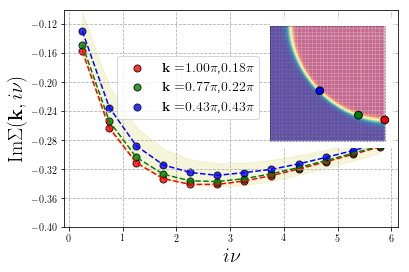

In [31]:
def subFermi (namefile, ax,  title=None, xtw =True , ytw =True, bar = False   ):    
    cmap = 'jet'
 # Choose colormap
    smap = plt.cm.Spectral
    # Get the colormap colors
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0.05, 0.2, smap.N)
    my_cmap = ListedColormap(my_cmap)
    
    matriciona = np.loadtxt(namefile, comments ='#')
   
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/matriciona.shape[0]),np.arange(0.,np.pi,np.pi/matriciona.shape[0]),matriciona,cmap=my_cmap)     
    ax.set_aspect(1) 


#kx,ky =np.loadtxt('../data/Self_energy_fill_0.600_patch.txt',unpack=True)
#kx,ky=lf[:,0],lf[:,1]

# Self energy data


self = np.transpose(np.loadtxt('../data/Self_energy_fill_0.975_Im.txt'))
T = 0.08

# Patch data
kx, ky = np.loadtxt('../data/Self_energy_fill_0.975_patch.txt',usecols=(0,1),unpack=True)

FSstart   = np.shape(kx)[0]-10-1
FSend     = np.shape(kx)[0]-1

#hs        = np.argmin(np.array( [ dist((np.pi-(ky[i]-kx[i]))/2.,np.pi-((np.pi-(ky[i]-kx[i]))/2. ), kx[i],ky[i]  ) for i in range(FSstart,FSend)  ] ))
imax      = np.unravel_index(np.argmin( self ), self.shape)[0] 
imin      = np.argmin([np.max(np.abs(self[i,:])) for i in range (self.shape[0])])
ikplt     =  [          FSstart        , FSstart + 5 ,       FSend-1        ]
col       =  [           'r'           , 'g',         'b'            ]
wmax=12
w = np.array(range(wmax))
om = np.pi*(2.*w[:]+1.)*T

se_max = np.array( [ np.max(self[:,iw]) for iw in w ] )
se_min = np.array( [ np.min(self[:,iw]) for iw in w ] )
#plt.fill_between( om, self[imax,:w[-1]+1], self[imin,:w[-1]+1] , color='y')
plt.fill_between( om, se_min, se_max , color='y', alpha=0.14)


for ik, i in zip(ikplt,range(len(ikplt))):
    se_plt = self[ik,:w[-1]+1]
    lab =r"$\mathbf{k} =$"+ r"${:.2f}$".format(kx[ik]/np.pi)+r"$\pi$,"+r"${:.2f}$".format(ky[ik]/np.pi)+r"$\pi$"
    plt.plot( om, se_plt , color=col[i],linestyle='dashed')
    plt.scatter( om, se_plt ,marker = 'o',edgecolor='black',  label=lab ,alpha=0.8, s=50.0,color = col[i]) 
plt.gca().set_yticks(np.arange(0.,-0.5,-0.04))
plt.gca().set_xlabel(r'$i\nu$', fontsize = 20)
plt.gca().set_ylabel(r'$\mathrm{Im}\Sigma(\mathbf{k},i\nu)$', fontsize = 20)
#plt.ylim([-0.36,-0.10])
plt.ylim([-0.40,-0.1])
plt.grid(linestyle='dashed')
plt.legend(loc=(0.16,0.5), fontsize=14)

# Inset
psize = 50.0
ax = plt.axes([0.52, 0.40, .45, .45])
subFermi('../data/Fermi_occupation_NOSE_fill0_975.txt',ax)
color = ['none' for i in range(kx.shape[0])]
size  = [10.0 for i in range(kx.shape[0])]
#color[kx.shape[0]-2] = 'blue'
#color[kx.shape[0]-11]= 'red'
#color[kx.shape[0]-6]= 'green'
#size[kx.shape[0]-2] = psize
#size[kx.shape[0]-11] = psize
#size[kx.shape[0]-6] = psize
#ax.scatter(kx,ky,marker = 'o', s=size, alpha= 1.0,edgecolor = 'black',c=color)

ax.scatter(kx[ikplt],ky[ikplt],marker='o',edgecolor='black', s=60,c=['red','green','blue'])
#ax.set_xticks(np.arange(0.,np.pi,np.pi/4))
#ax.set_yticks(np.arange(np.pi/4,np.pi,np.pi/4))
#ax.set_xticklabels([r'0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$'],fontsize =16)
#ax.set_yticklabels([r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$'],fontsize =16)
ax.set_xticks([])
ax.set_yticks([])
ax.plot([0.,0.],[np.pi,0.],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([0,np.pi],[np.pi,np.pi],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([np.pi,np.pi],[0.,np.pi],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([0.0,np.pi],[0.0,0.0],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)    
#ax.set_xlim(0,np.pi)
ax.set_ylim(-0.2,np.pi+0.2)
#ax.text(0.25,2.8,r'Brillouin Zone',fontsize=12)
#ax.set_title(r'Brillouin Zone')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_aspect(1)

plt.savefig('../images/juppy/Self_Im_occ0975.png')